In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
n = 6
i1 = n - 1
i2 = n + 29
i3 = n + 59

In [5]:
data_dir = 'C:/Users/Admin/Desktop/іваночка_3_курс/2 семестр/нейронки/train'
classes = sorted(os.listdir(data_dir))
#selected_classes = [classes[i1], classes[i2], classes[i3]]
classes

['beet_salad', 'escargots', 'mussels']

In [16]:
train_data = []
test_data = []

for cls in classes:
    cls_path = os.path.join(data_dir, cls)
    cls_images = [os.path.join(cls, img) for img in os.listdir(cls_path)]
    train, test = train_test_split(cls_images, test_size=0.2, random_state=42)
    train_data.extend([(cls, img) for img in train])
    test_data.extend([(cls, img) for img in test])

train_df = pd.DataFrame(train_data, columns=['class', 'image'])
test_df = pd.DataFrame(test_data, columns=['class', 'image'])

In [17]:
img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(train_df, directory=data_dir, x_col='image', y_col='class', target_size=img_size, batch_size=batch_size, class_mode='categorical')
test_generator = test_datagen.flow_from_dataframe(test_df, directory=data_dir, x_col='image', y_col='class', target_size=img_size, batch_size=batch_size, class_mode='categorical', shuffle=False)

Found 180 validated image filenames belonging to 3 classes.
Found 45 validated image filenames belonging to 3 classes.


In [30]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(*img_size, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(612, activation='relu'),
    Dense(3, activation='softmax')])


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 26, 26, 128)     

In [32]:
history= model.fit(
train_generator,
epochs=50,
steps_per_epoch = int(np.ceil(len(train_generator)/float(batch_size))),
validation_data = test_generator,
validation_steps = int(np.ceil(len(train_generator)/float(batch_size))))

Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 1.0812 - accuracy: 0.4375 - val_loss: 30.9740 - val_accuracy: 0.0625
Epoch 2/50
1/1 [==============================] - 3s 3s/step - loss: 25.0774 - accuracy: 0.2500 - val_loss: 7.4509 - val_accuracy: 0.4688
Epoch 3/50
1/1 [==============================] - 3s 3s/step - loss: 6.6782 - accuracy: 0.4688 - val_loss: 1.7253 - val_accuracy: 0.4688
Epoch 4/50
1/1 [==============================] - 3s 3s/step - loss: 3.4327 - accuracy: 0.3500 - val_loss: 1.2433 - val_accuracy: 0.4688
Epoch 5/50
1/1 [==============================] - 3s 3s/step - loss: 2.1947 - accuracy: 0.3125 - val_loss: 1.0912 - val_accuracy: 0.4688
Epoch 6/50
1/1 [==============================] - 3s 3s/step - loss: 1.3001 - accuracy: 0.4375 - val_loss: 1.0424 - val_accuracy: 0.4688
Epoch 7/50
1/1 [==============================] - 3s 3s/step - loss: 1.1435 - accuracy: 0.3438 - val_loss: 1.0952 - val_accuracy: 0.4688
Epoch 8/50
1/1 [=======================

In [33]:
loss, accuracy = model.evaluate(test_generator)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

2/2 [==============================] - 1s 180ms/step - loss: 0.9429 - accuracy: 0.5778
Test loss: 0.9429
Test accuracy: 0.5778


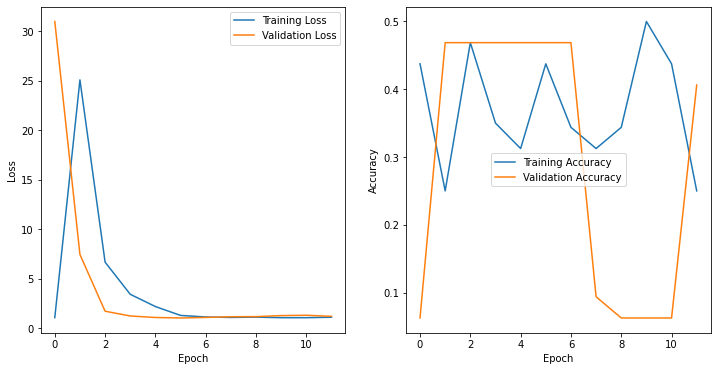

In [39]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), history.history['loss'][:epochs], label='Training Loss')
plt.plot(range(epochs), history.history['val_loss'][:epochs], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), history.history['accuracy'][:epochs], label='Training Accuracy')
plt.plot(range(epochs), history.history['val_accuracy'][:epochs], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()